In [5]:
# pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
from functools import partial

from data_viewer import show_sample_examples, WDSViewer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# WDS

,lang,question,response,image
0,en,Where does this dish originate from?,France,
1,en,To which culinary heritage does this dish belong?,Seychelles,
2,en,Where does this dish originate from?,Japan,

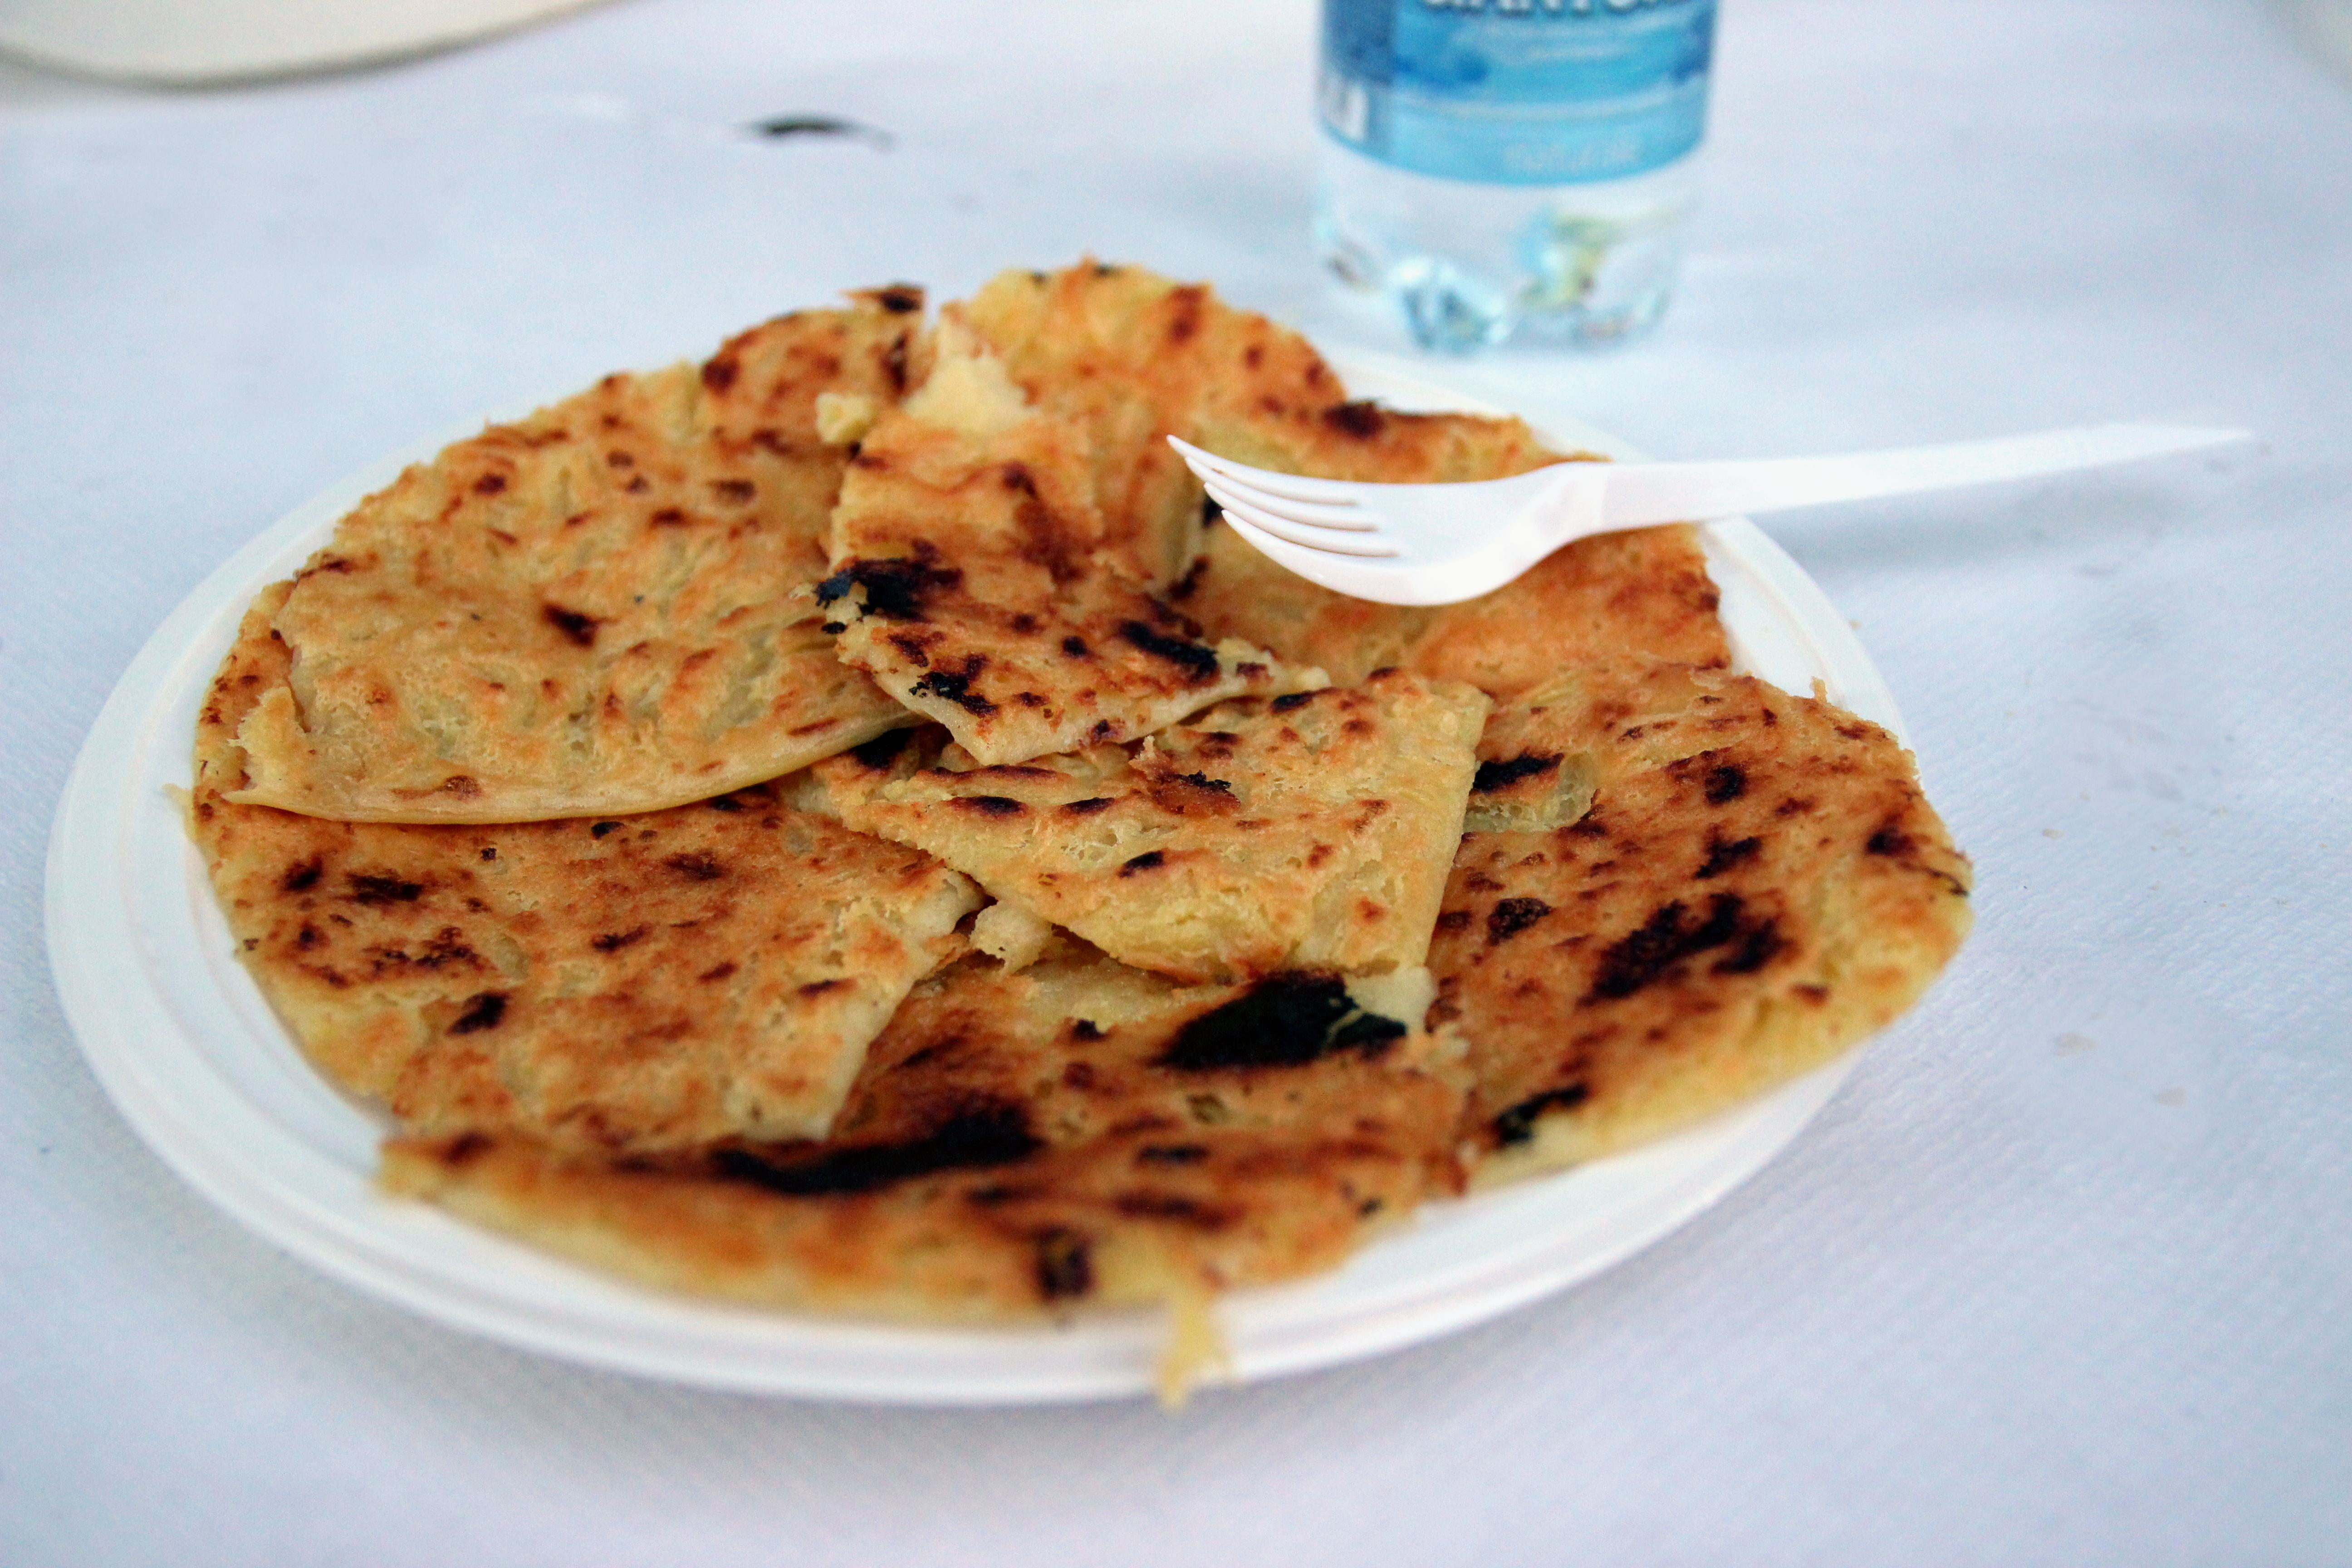
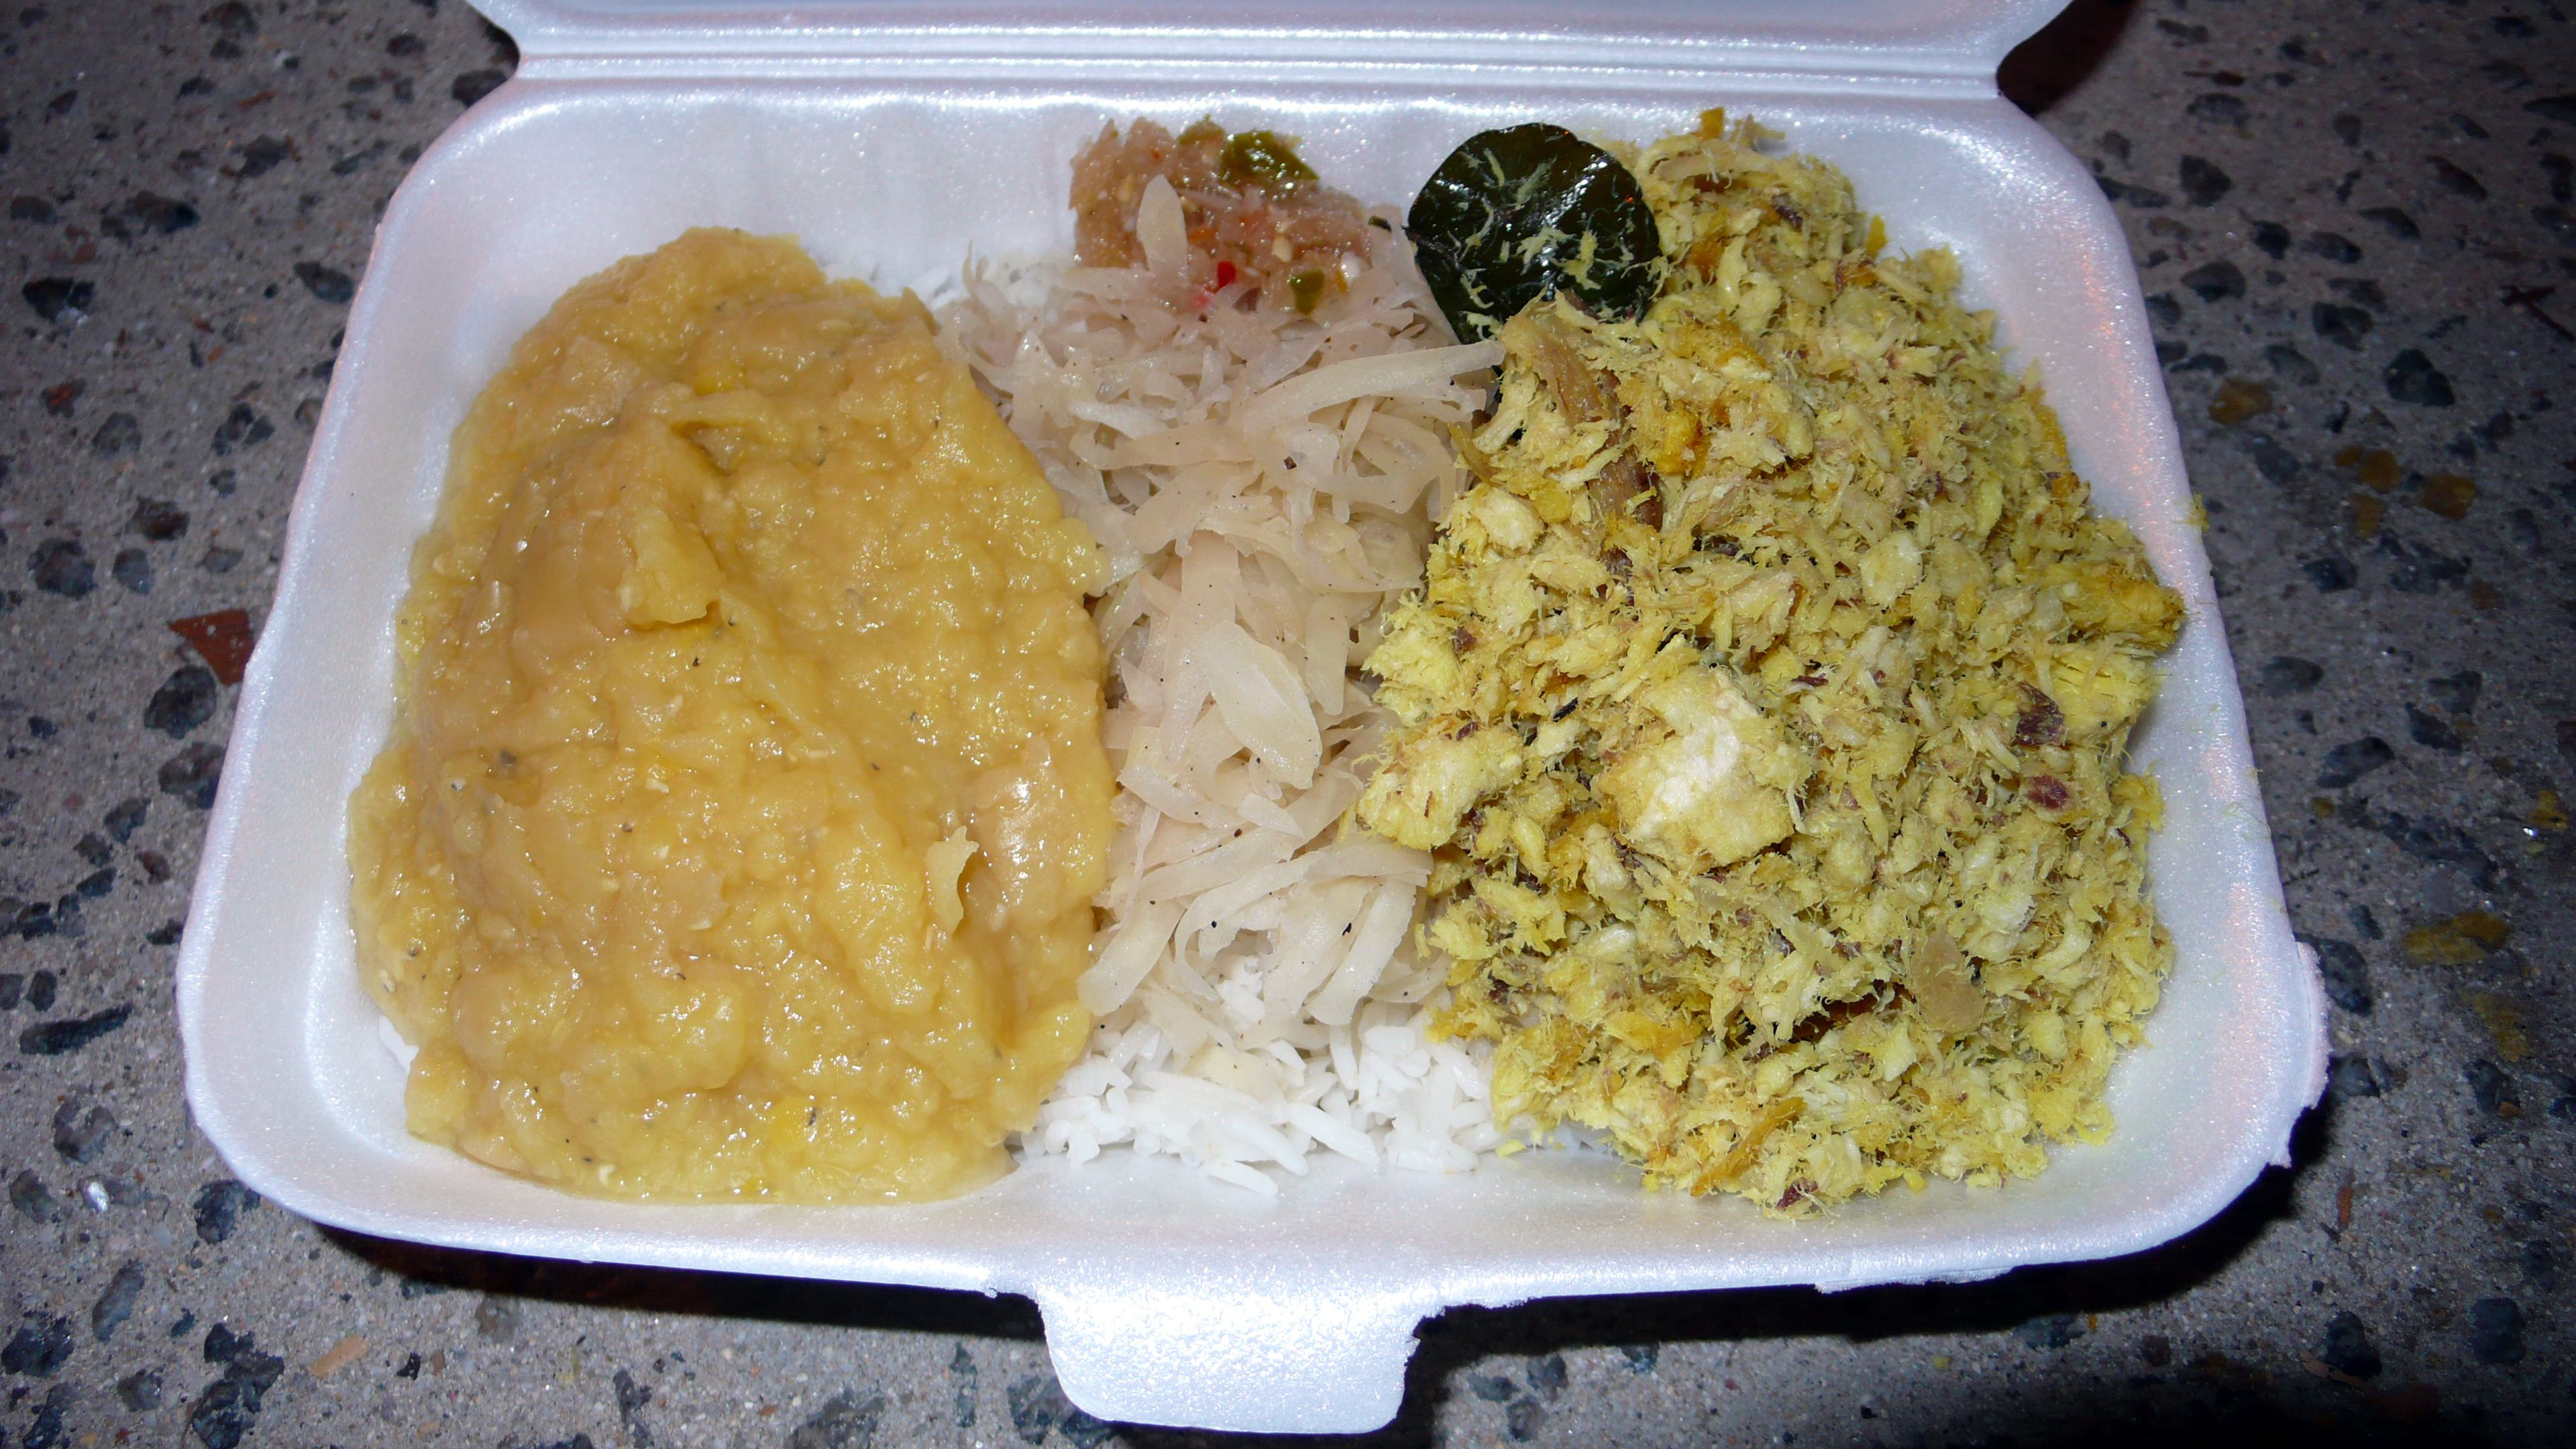
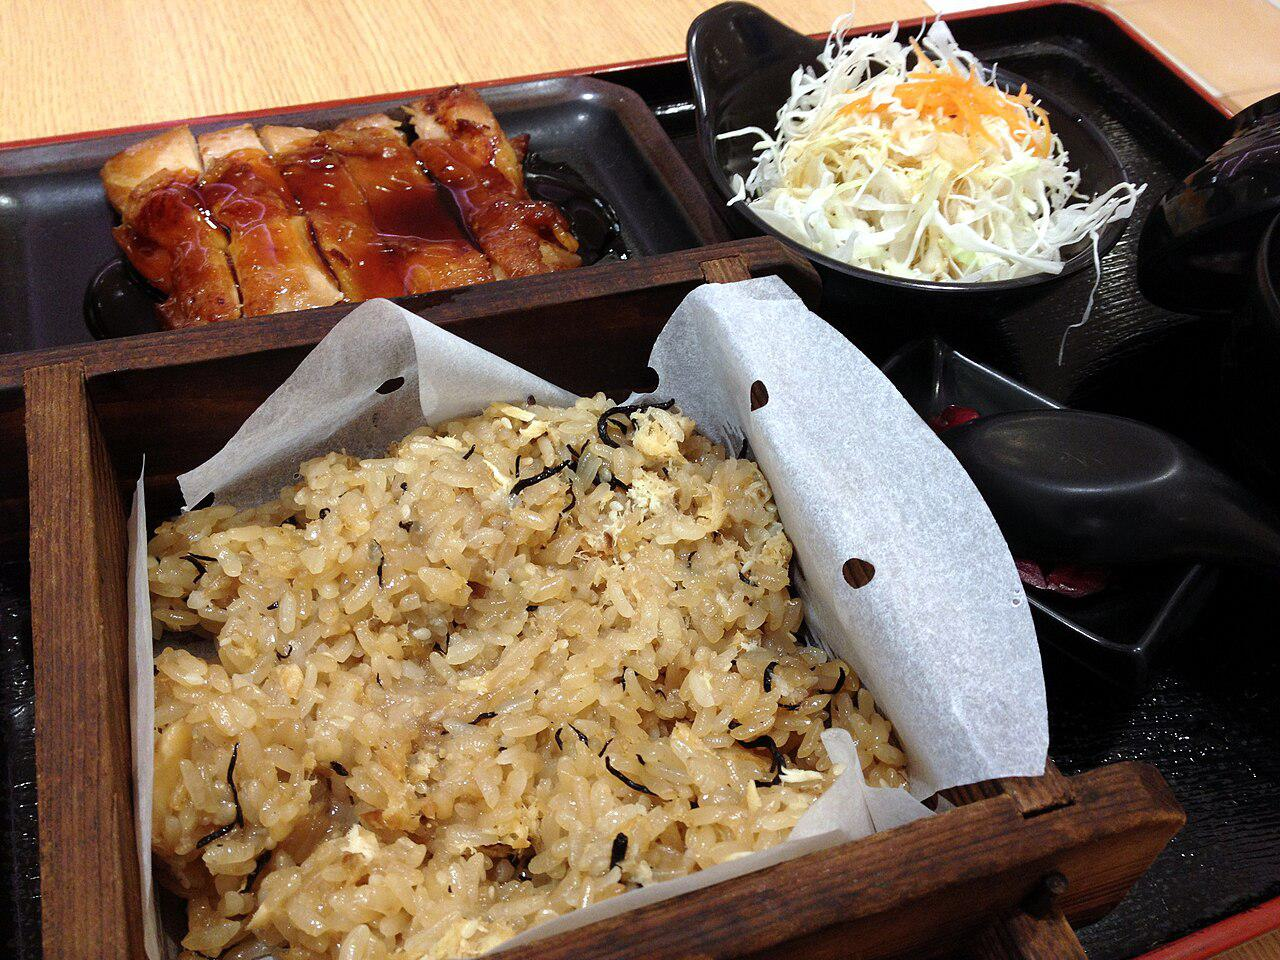

In [11]:
HTML(WDSViewer.view(
    path="/fsx_3/bucket/yetian12/open-ended-cleaned",
))